<a href="https://colab.research.google.com/github/RPAlbuquerque/Data-Science-UFRGS/blob/main/Tramontina_%26_Mobility_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Importing libraries and mobility database of the city of Salvador:

In [ ]:
import pandas as pd

# Especifique o caminho para o arquivo CSV
arquivo_csv = 'C:/Users/Rafae/OneDrive/Área de Trabalho/export-20231001-20231123.csv'

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv(arquivo_csv)


FileNotFoundError: ignored

In [ ]:
print(df.head())


               poi Age Range Socioeconomic Level Gender  Unique Visitors  \
0  292740805100008     40_49                   B      F              847   
1  292740805100008     60_69                   C      F             1407   
2  292740805100008     70_79                   A      F               41   
3  292740805100008     30_39                   C      M             4735   
4  292740805100008     25_29                   C      M             2621   

   Unique Visitors Week 1  Unique Visitors Week 2  Unique Visitors Week 3  \
0                     371                     402                     483   
1                     616                     669                     802   
2                      18                      19                      23   
3                    2051                    2228                    2705   
4                    1133                    1231                    1499   

   Unique Visitors Week 4  Visits  ...  Visits Sunday Block 1  \
0              

##Selecting the POI column with census codes:

In [ ]:
coluna = df['poi']
print(df['poi'])

0         292740805100008
1         292740805100008
2         292740805100008
3         292740805100008
4         292740805100008
               ...       
364155    292740805210313
364156    292740805210313
364157    292740805210313
364158    292740805210313
364159    292740805210313
Name: poi, Length: 364160, dtype: int64


##Selecting the census tract (CD_GEOCODI) 292740805270144.
##Source: Salvador City Hall ID 54.722

In [ ]:
poi_292740805270144 = df[df['poi'] == 292740805270144]
print(poi_292740805270144)

                   poi Age Range Socioeconomic Level Gender  Unique Visitors  \
25840  292740805270144     40_49                   B      F               20   
25841  292740805270144     60_69                   C      F               33   
25842  292740805270144     70_79                   A      F                0   
25843  292740805270144     30_39                   C      M              112   
25844  292740805270144     25_29                   C      M               62   
...                ...       ...                 ...    ...              ...   
25915  292740805270144     25_29                   E      M               46   
25916  292740805270144   80_plus                   A      M                0   
25917  292740805270144     70_79                   C      F               17   
25918  292740805270144     18_24                   B      F               18   
25919  292740805270144     60_69                   C      M               35   

       Unique Visitors Week 1  Unique V

In [ ]:
!pip install geopandas folium matplotlib


In [ ]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt


In [ ]:
import geopandas as gpd
import os

# Set the SHAPE_RESTORE_SHX config option to YES
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Read the shapefile
gdf = gpd.read_file('/content/BA_Setores_2021.shp')

In [ ]:
print(gdf.head())


                                            geometry
0  POLYGON ((-41.65404 -13.25992, -41.65429 -13.2...
1  POLYGON ((-41.66355 -13.25025, -41.66324 -13.2...
2  POLYGON ((-41.66645 -13.25044, -41.66649 -13.2...
3  POLYGON ((-41.66355 -13.25025, -41.66425 -13.2...
4  POLYGON ((-41.65110 -13.25848, -41.65404 -13.2...


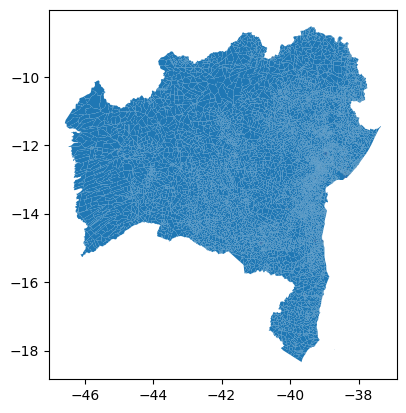

In [ ]:
gdf.plot()
plt.show()

In [ ]:
import folium
import geopandas as gpd

# Carregar o arquivo shapefile
gdf = gpd.read_file('/content/BA_Setores_2021.shp')

# Definir o CRS (substitua 'EPSG:4326' pelo CRS correto para suas coordenadas)
gdf = gdf.set_crs('EPSG:4326')

# Verificar o CRS
print(gdf.crs)

# Se necessário, converter para um CRS diferente
gdf = gdf.to_crs('EPSG:3857')  # Por exemplo, para o sistema de coordenadas de mercator

# Criar um mapa com base nas coordenadas médias do shapefile
m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=12)

# Adicionar o shapefile ao mapa
folium.GeoJson(gdf).add_to(m)

# Salvar o mapa como um arquivo HTML
m.save('mapa.html')

# Exibir o mapa
m


EPSG:4326
